# Import Libaries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()  # Manually upload the Iris.csv file here


Saving Iris.csv to Iris.csv


# Load the Dataset

In [ ]:
iris = pd.read_csv('Iris.csv')

# Dataset Preprocessing

In [ ]:
iris.drop('Id', axis=1, inplace=True)

# Separate features and Lables


In [ ]:
features = iris.drop('Species', axis=1)
labels = iris['Species']

# Standarized the Features

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Histogram Plot

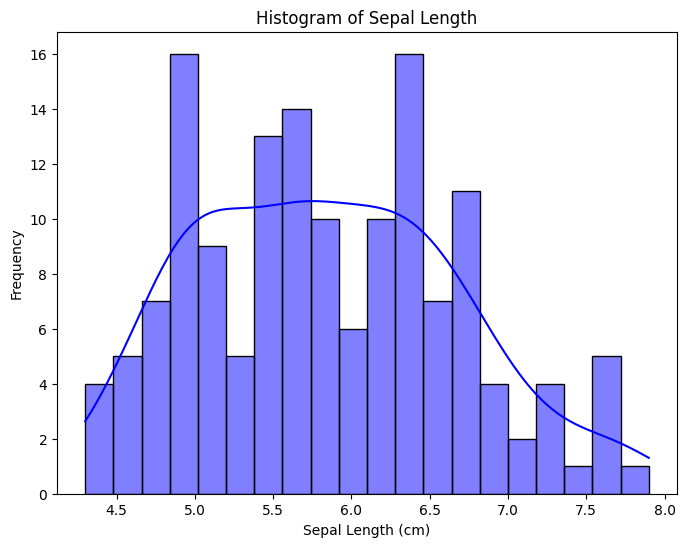

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(features['SepalLengthCm'], kde=True, color='blue', bins=20)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


# Sactter Plot

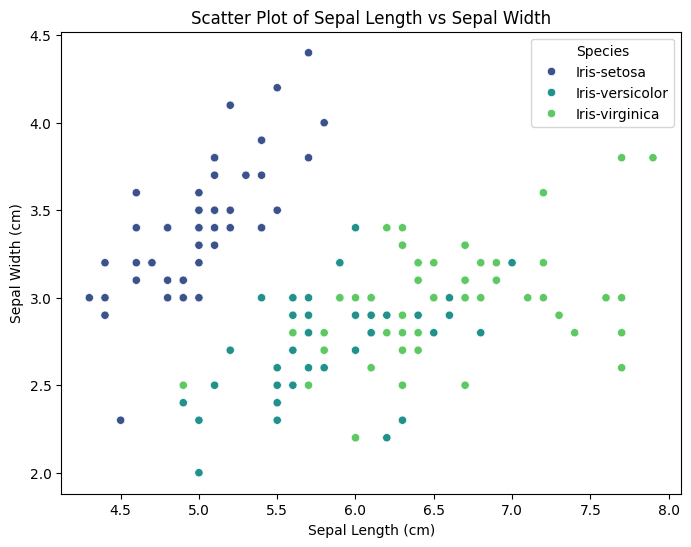

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()


# Heatmap

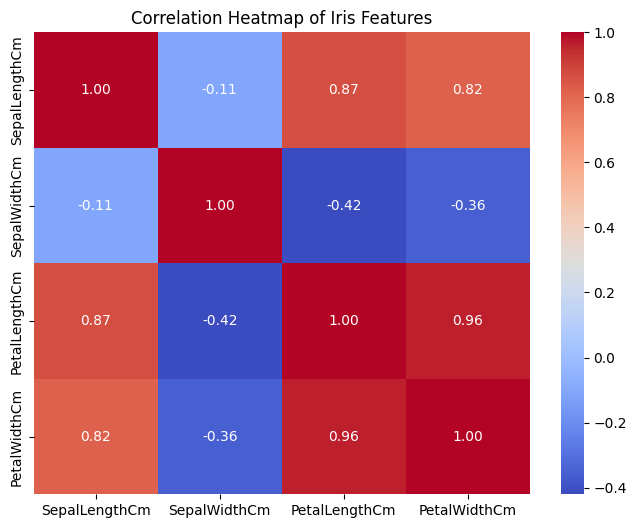

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Iris Features')
plt.show()

Elbow plot for K-means clusturing

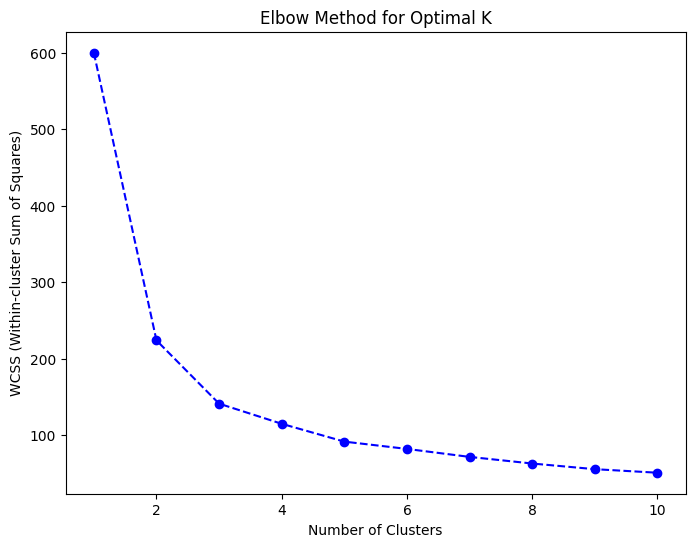

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()